https://github.com/GreatLearningAIML1/gl-pgp-aiml-uta-intl-may20-kv2001

Project 3 - Ensemble

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn import metrics as m
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import roc_auc_score

In [2]:
data1 = pd.read_csv('bank-full.csv')
data2 = pd.read_csv('bank-additional-full.csv',sep= ';')

In [3]:
data1.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
data1.shape

(45211, 17)

In [5]:
data2.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [6]:
data2.shape

(41188, 21)

In [7]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [8]:
data1.isnull().sum() # to identify any null values

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

In [9]:
data1.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [10]:
for col in data1.columns:
    print (col, len(data1[col].unique()))   # number of unique in each column

age 77
job 12
marital 3
education 4
default 2
balance 7168
housing 2
loan 2
contact 3
day 31
month 12
duration 1573
campaign 48
pdays 559
previous 41
poutcome 4
Target 2


In [11]:
data = data1.drop(['day','poutcome'],axis=1) #dropping col 'day' and 'poutcome' -not much value to the analysis

In [12]:
# categorical columns
data['job']=data['job'].replace({1: 'admin.', 2: 'unknown', 3: 'unemployed',4: 'management',5: 'entrepreneur',6: 'student', 7: 'blue-collar', 8: 'self-employed',9: 'retired',10: 'technician',11: 'services'})
data['marital']=data['marital'].replace({0: 'married', 1: 'divorced', 3: 'single'})
data['education']=data['education'].replace({0: 'unknown', 1: 'secondary',3: 'primary', 4: 'tertiary'})
data['default']=data['default'].replace({0: 'No', 1: 'Yes'})
data['housing']=data['housing'].replace({0: 'No', 1: 'Yes'})
data['loan']=data['loan'].replace({0: 'No', 1: 'Yes'})
data['month']=data['month'].replace({1: 'jan', 2: 'feb', 3: 'march',4: 'april',5: 'may',6: 'jun', 7: 'jul', 8: 'aug',9: 'sep',10: 'oct',11: 'nov', 12: 'dec'})
data = pd.get_dummies(data, columns=['job','marital','education','default','housing','loan'])
data.head()

,age,balance,contact,month,duration,campaign,pdays,previous,Target,job_admin.,...,education_primary,education_secondary,education_tertiary,education_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes
0,58,2143,unknown,may,261,1,-1,0,no,0,...,0,0,1,0,1,0,0,1,1,0
1,44,29,unknown,may,151,1,-1,0,no,0,...,0,1,0,0,1,0,0,1,1,0
2,33,2,unknown,may,76,1,-1,0,no,0,...,0,1,0,0,1,0,0,1,0,1
3,47,1506,unknown,may,92,1,-1,0,no,0,...,0,0,0,1,1,0,0,1,1,0
4,33,1,unknown,may,198,1,-1,0,no,0,...,0,0,0,1,1,0,1,0,1,0


In [13]:
data= data.drop(['job_unknown','marital_divorced','education_unknown','default_no','housing_no','loan_no'],axis=1)

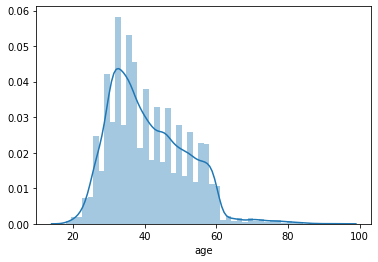

In [14]:
sns.distplot(data['age']);

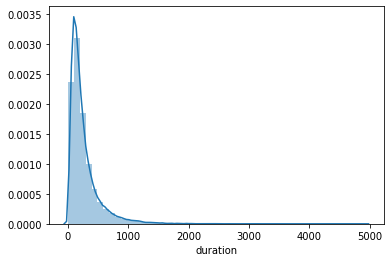

In [15]:
sns.distplot(data['duration']);

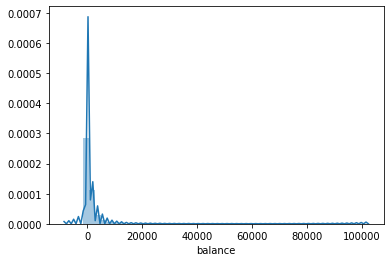

In [16]:
sns.distplot(data['balance']);

In [17]:
classifiers = {'Gradient Boosting Classifier':GradientBoostingClassifier(),
               'Adaptive Boosting Classifier':AdaBoostClassifier(),
               'Logistic Regression':LogisticRegression(),
               'Random Forest Classifier': RandomForestClassifier()}
